In [76]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [77]:
data=pd.read_csv('bike_rental_data.csv')

In [78]:
data.head()

,Unnamed: 0,dteday,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,2011-01-02,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,2011-01-03,1,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,2011-01-04,1,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,2011-01-05,1,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [79]:
data= data.drop(['Unnamed: 0','dteday'],axis=1)

In [80]:
data.describe()

,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,6.519836,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,3.451913,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,4.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,7.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,10.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,12.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


## Task:1  Examining the relationship between the variables of the data using descriptive analyses

In [81]:
# Checking the dependent variable count(Rentals)
import matplotlib.pyplot as plt
import seaborn as sns

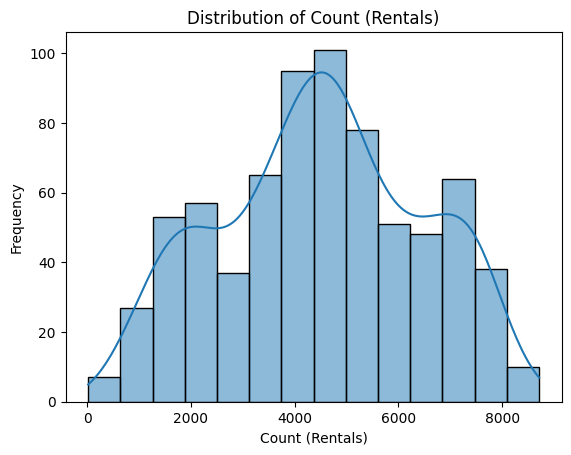

In [82]:
# Plotting the distribution of Count (Rentals)
sns.histplot(data['cnt'], kde=True)
plt.title("Distribution of Count (Rentals)")  # Updated title
plt.xlabel("Count (Rentals)")  # Updated x-axis label
plt.ylabel("Frequency")  # Updated y-axis label
plt.show()


In [83]:
from scipy.stats import skew
skewness=skew(data['cnt'])
print(f"Skewness : {skewness}")

Skewness : -0.04725555755362063


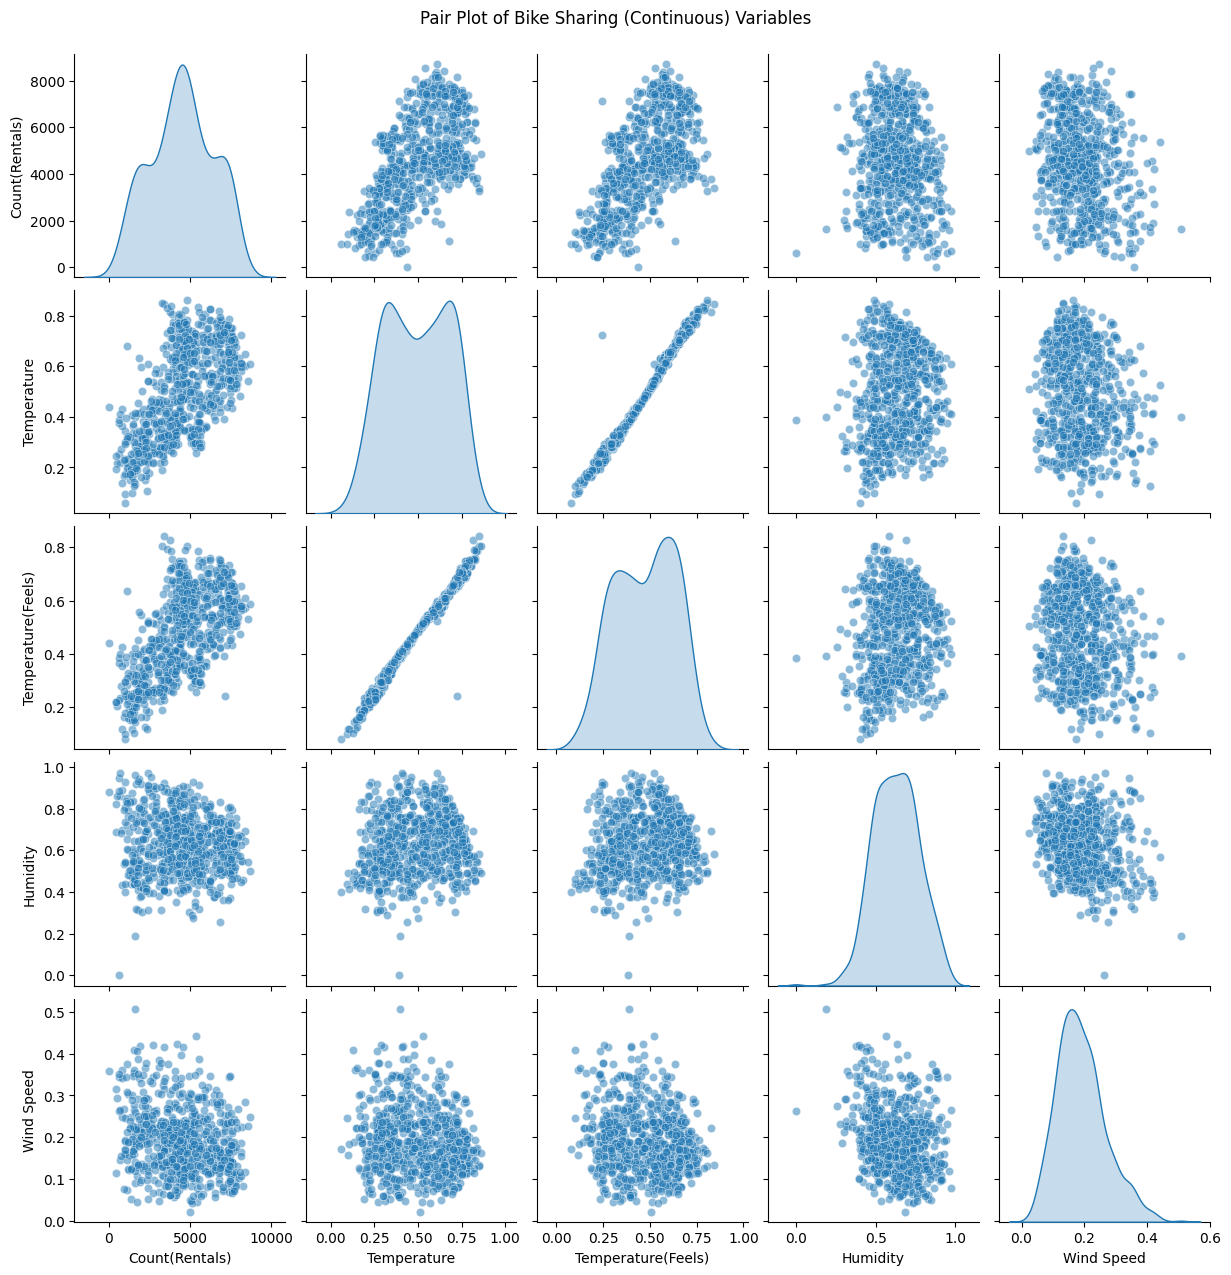

In [84]:
#Checking the relationshp of continuous variable with cnt  
# Rename variables for better visualization
data_renamed = data.rename(columns={
    'cnt': 'Count(Rentals)',
    'temp': 'Temperature',
    'atemp': 'Temperature(Feels)',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed'
})

# Generate the pair plot for continuous variables
continuous_vars = ['Count(Rentals)', 'Temperature', 'Temperature(Feels)', 'Humidity', 'Wind Speed']
pairplot_data = data_renamed[continuous_vars]

sns.pairplot(pairplot_data, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Bike Sharing (Continuous) Variables", y=1.02)  # Title for the pair plot
plt.show()


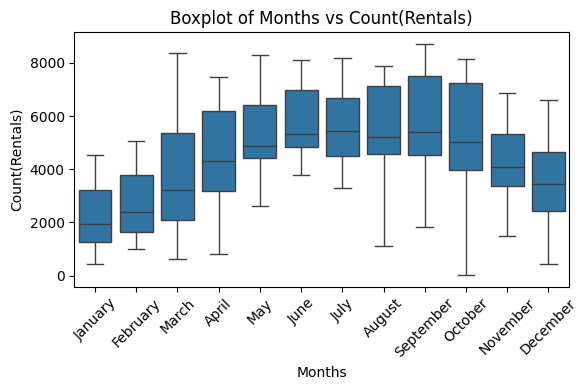

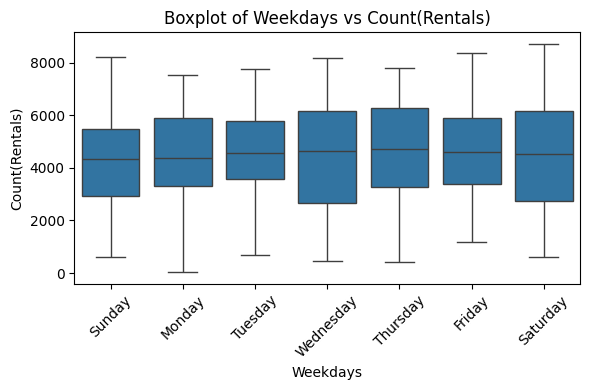

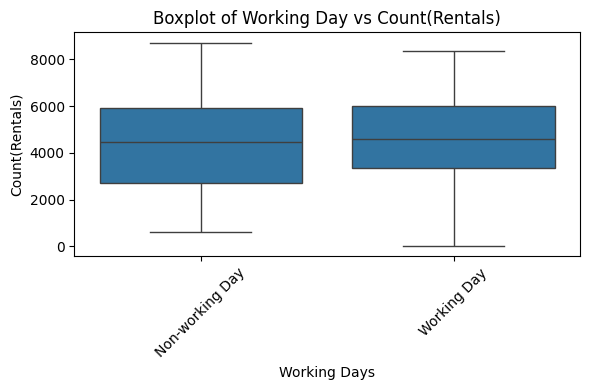

In [85]:
#Boxplot to show relationship of categorical variables with count 

# Define mapping for month and weekday names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

weekday_names = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}

# Add a mapping for 'workingday' if necessary
workingday_labels = {0: 'Non-working Day', 1: 'Working Day'}

# Function to generate boxplots with proper labels
def generate_boxplot(data, var, y, title, x_label, x_labels):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[var], y=data[y])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Count(Rentals)')  # Replace y-axis label with "Count"
    plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)
    plt.tight_layout()
    plt.show()

# Generate boxplots for each categorical variable
categorical_vars = ['mnth', 'weekday', 'workingday']

for var in categorical_vars:
    if var == 'mnth':
        generate_boxplot(data, var, 'cnt', 'Boxplot of Months vs Count(Rentals)', 'Months', list(month_names.values()))
    elif var == 'weekday':
        generate_boxplot(data, var, 'cnt', 'Boxplot of Weekdays vs Count(Rentals)', 'Weekdays', list(weekday_names.values()))
    elif var == 'workingday':
        generate_boxplot(data, var, 'cnt', 'Boxplot of Working Day vs Count(Rentals)', 'Working Days', list(workingday_labels.values()))


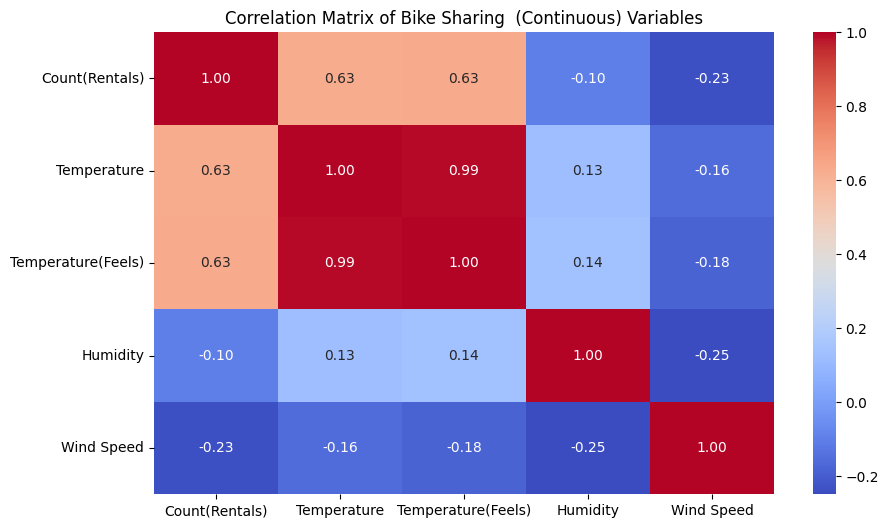

In [86]:
# Rename variables for better visualization
data_renamed = data.rename(columns={
    'cnt': 'Count(Rentals)',
    'temp': 'Temperature',
    'atemp': 'Temperature(Feels)',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed'
})

# Calculate the correlation matrix with renamed columns
correlation_matrix = data_renamed[['Count(Rentals)', 'Temperature', 'Temperature(Feels)', 'Humidity', 'Wind Speed']].corr()

# Plot the heatmap with descriptive variable names
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bike Sharing  (Continuous) Variables')
plt.show()


## Task 2: Determine a linear regression model of the cnt based on all other given variables.Also consider the non-linear relationship with temp if necessary

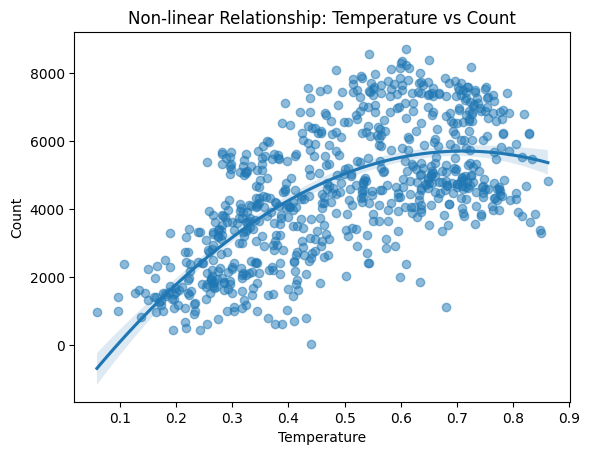

In [87]:
# Displaying non-linear relationship 
sns.regplot(
    x='temp', 
    y='cnt', 
    data=data, 
    scatter_kws={'alpha': 0.5}, 
    order=2
)
plt.title('Non-linear Relationship: Temperature vs Count')  # Updated title
plt.xlabel('Temperature')  # Updated x-axis label
plt.ylabel('Count')  # Updated y-axis label
plt.show()


In [88]:
# Add polynomial terms for temperature
data['temp_sq'] = data['temp'] ** 2


In [89]:
bike_data=data

In [90]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mnth        731 non-null    int64  
 1   weekday     731 non-null    int64  
 2   workingday  731 non-null    int64  
 3   weathersit  731 non-null    int64  
 4   temp        731 non-null    float64
 5   atemp       731 non-null    float64
 6   hum         731 non-null    float64
 7   windspeed   731 non-null    float64
 8   cnt         731 non-null    int64  
 9   temp_sq     731 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 57.2 KB


In [91]:
bike_data = pd.get_dummies(data, columns=['mnth','weathersit','weekday'], drop_first=True)

In [92]:
# Ensure all columns are numeric
bike_data = bike_data.apply(pd.to_numeric, errors='coerce')
# Convert all boolean columns to numeric (1 for True, 0 for False)
bike_data = bike_data.applymap(lambda x: int(x) if isinstance(x, bool) else x)


C:\Users\xyzsi\AppData\Local\Temp\ipykernel_19560\1437511580.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bike_data = bike_data.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [93]:
y=bike_data['cnt']
X=bike_data[['workingday', 'temp', 'atemp', 'temp_sq','hum', 'windspeed'] + 
       
       [col for col in bike_data.columns if 'weathersit_' in col]+
       [col for col in bike_data.columns if 'weekday_' in col]+
        [col for col in bike_data.columns if 'mnth_' in col]]
    

In [94]:
X=sm.add_constant(X)

In [95]:
model=sm.OLS(y,X)

In [96]:
results=model.fit()

In [97]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     44.19
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          2.89e-126
Time:                        01:55:10   Log-Likelihood:                -6225.1
No. Observations:                 731   AIC:                         1.250e+04
Df Residuals:                     705   BIC:                         1.262e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          625.6820    468.705      1.335   

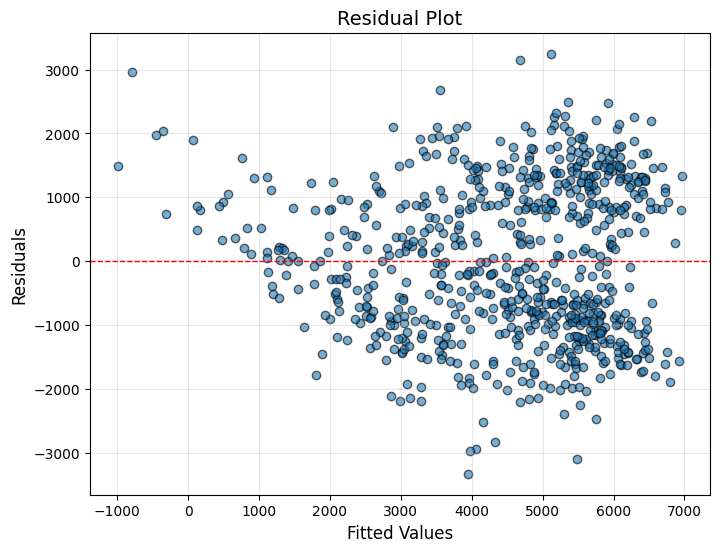

In [98]:
# Calculate residuals and predicted values
residuals_initial = results.resid
fitted_values_intial = results.fittedvalues

# Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values_intial, residuals_initial, alpha=0.6, edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Fitted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

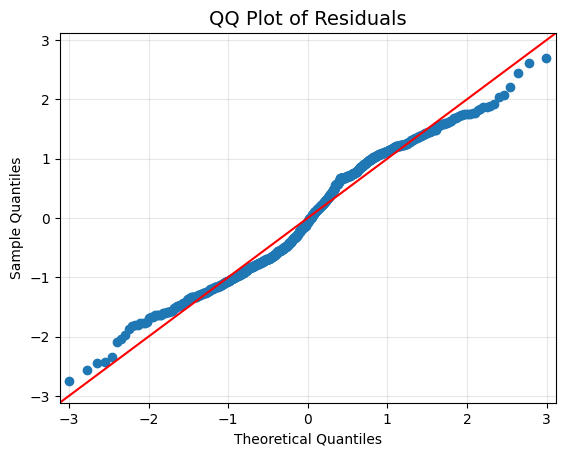

In [99]:
# QQ plot for residuals
sm.qqplot(residuals_initial, line='45', fit=True)
plt.title('QQ Plot of Residuals', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

## Task 3: Find a suitable subset of explanatory variables for the cnt

In [124]:
def backward_elimination_aic(X, y):
    """
    Perform backward elimination using AIC to select the best subset of features.
    """
    # Add a constant to the model for the intercept
    X = sm.add_constant(X)
    current_aic = float('inf')  # Initialize with a very high AIC
    best_model = None
    models=[]
    
    while True:
        # Fit the model with the current set of features
        model = sm.OLS(y, X).fit()
        aic = model.aic  # Get the current model's AIC
        models.append({'model': model, 'aic':aic, 'features': X.columns.tolist()})
        # If AIC improves, update the best model and current AIC
        if aic < current_aic:
            current_aic = aic
            best_model = model
            
        else:
            break  # Stop if removing a feature doesn't improve AIC
        
        # Identify the feature to drop (excluding the constant term)
        if len(X.columns)>1:
            worst_feature = model.pvalues.drop('const').idxmax()  # Feature with the highest p-value
            print(f"Removing feature: {worst_feature} (AIC = {current_aic:.4f})")
            X = X.drop(columns=[worst_feature])
    models=sorted(models,key=lambda x:x['aic'])
    
    return best_model, X.columns, models

In [125]:
# Prepare the feature set X and target y
y = bike_data['cnt']
X = bike_data[['workingday', 'temp', 'atemp', 'temp_sq', 'hum', 'windspeed'] +
              [col for col in bike_data.columns if 'weekday_' in col] +
              [col for col in bike_data.columns if 'weathersit_' in col] +
              [col for col in bike_data.columns if 'mnth_' in col]]

# Perform backward elimination
best_model, selected_features, models = backward_elimination_aic(X, y)

# Print the results
print(f"Selected Features: {selected_features}")
print(f"Best AIC of Best Model: {best_model.aic:.3f}")  # Display the best AIC value
print(best_model.summary())


Removing feature: mnth_4 (AIC = 12502.2108)
Removing feature: weekday_3 (AIC = 12500.2133)
Removing feature: weekday_5 (AIC = 12498.8464)
Removing feature: weekday_4 (AIC = 12496.9591)
Removing feature: weekday_2 (AIC = 12495.0544)
Removing feature: mnth_7 (AIC = 12493.3903)
Removing feature: mnth_6 (AIC = 12492.3026)
Removing feature: mnth_8 (AIC = 12490.7521)
Removing feature: mnth_12 (AIC = 12489.1229)
Removing feature: mnth_5 (AIC = 12488.2241)
Removing feature: atemp (AIC = 12487.0107)
Removing feature: weekday_1 (AIC = 12486.6221)
Removing feature: mnth_11 (AIC = 12486.3719)
Selected Features: Index(['const', 'workingday', 'temp', 'temp_sq', 'hum', 'windspeed',
       'weekday_6', 'weathersit_2', 'weathersit_3', 'mnth_2', 'mnth_3',
       'mnth_9', 'mnth_10'],
      dtype='object')
Best AIC of Best Model: 12486.372
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.606
Model:   

# Task 4: Create residual plot for  model evaluation

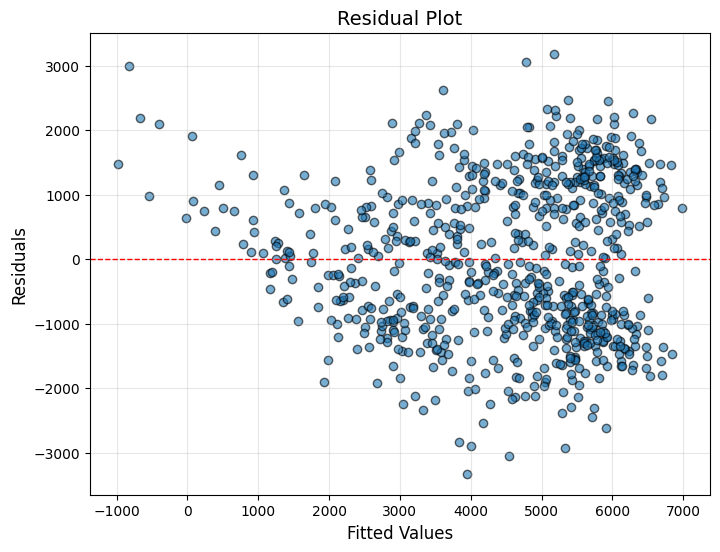

In [126]:
# Calculate residuals and predicted values
residuals = best_model.resid
fitted_values = best_model.fittedvalues

# Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.6, edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Fitted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

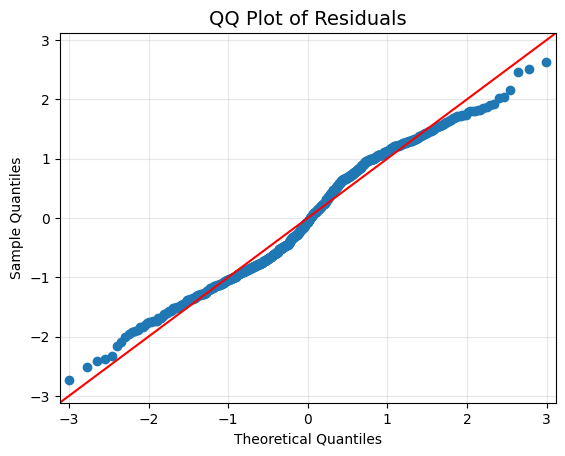

In [127]:
# QQ plot for residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [128]:
selected_features = best_model.model.exog_names
selected_features.remove('const')

In [118]:
selected_features_df= bike_data[selected_features]

In [119]:
X_with_const=sm.add_constant(selected_features_df)

In [120]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]


In [121]:
print(vif_data)

         Feature        VIF
0          const  89.966433
1     workingday   1.595405
2           temp  41.922899
3        temp_sq  42.445530
4            hum   1.944287
5      windspeed   1.184429
6      weekday_6   1.581027
7   weathersit_2   1.595972
8   weathersit_3   1.299028
9         mnth_2   1.211902
10        mnth_3   1.173800
11        mnth_9   1.132480
12       mnth_10   1.194533
13       mnth_11   1.202954


## Task 5: Formulate your final model regression

In [123]:
# Create a DataFrame for the top 3models
pd.set_option('display.max_colwidth', None)
top_models = pd.DataFrame({
    "Model Rank": [f"Model {i+1}" for i in range(3)],
    "AIC": [round(model['aic'], 3) for model in models[:3]],  # Round AIC values to 3 decimal places
    "Features": [", ".join(model['features']) for model in models[:3]]
})

# Display the top models in a tabular format
print("\nTop 3 Models Based on AIC:")
print(top_models)




Top 3 Models Based on AIC:
  Model Rank        AIC  \
0    Model 1  12486.372   
1    Model 2  12486.622   
2    Model 3  12487.011   

                                                                                                                                              Features  
0                    const, workingday, temp, temp_sq, hum, windspeed, weekday_6, weathersit_2, weathersit_3, mnth_2, mnth_3, mnth_9, mnth_10, mnth_11  
1         const, workingday, temp, temp_sq, hum, windspeed, weekday_1, weekday_6, weathersit_2, weathersit_3, mnth_2, mnth_3, mnth_9, mnth_10, mnth_11  
2  const, workingday, temp, atemp, temp_sq, hum, windspeed, weekday_1, weekday_6, weathersit_2, weathersit_3, mnth_2, mnth_3, mnth_9, mnth_10, mnth_11  


In [110]:
top_models

,Model Rank,AIC,Features
0,Model 1,12486.372,"const, workingday, temp, temp_sq, hum, windspeed, weekday_6, weathersit_2, weathersit_3, mnth_2, mnth_3, mnth_9, mnth_10, mnth_11"
1,Model 2,12486.622,"const, workingday, temp, temp_sq, hum, windspeed, weekday_1, weekday_6, weathersit_2, weathersit_3, mnth_2, mnth_3, mnth_9, mnth_10, mnth_11"
2,Model 3,12487.011,"const, workingday, temp, atemp, temp_sq, hum, windspeed, weekday_1, weekday_6, weathersit_2, weathersit_3, mnth_2, mnth_3, mnth_9, mnth_10, mnth_11"


In [111]:
top_models.to_excel("top_3_models.xlsx", index=False)